In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [15]:
sql = "select * from student"

In [17]:
df=pandas.read_sql_query(sql,conn)

df[:10]


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [30]:
sql_2 = """
select professor.p_name,course.c_name
from professor 
inner join course 
on professor.p_email = course.p_email 

"""

In [31]:
df=pandas.read_sql_query(sql_2,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [34]:
sql_3 = """
select count(c_number) as num_student, c_number
from enroll
group by c_number
order by num_student desc

"""

<AxesSubplot:xlabel='c_number'>

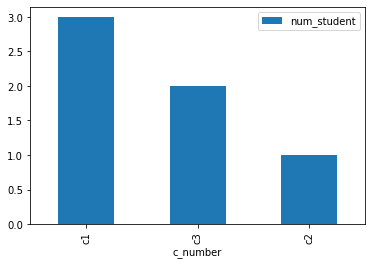

In [37]:
df=pandas.read_sql_query(sql_3,conn)

df.plot.bar(x='c_number',y='num_student')

In [61]:
sql_4 = """
select professor.p_name,count(*) as num_course
from professor 
inner join course 
on professor.p_email = course.p_email 
group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

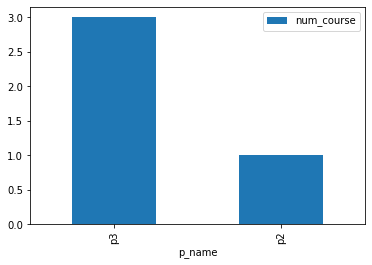

In [62]:
df=pandas.read_sql_query(sql_4,conn)

df.plot.bar(x='p_name',y='num_course')

In [63]:
sql_5 = """
insert into student(s_email,s_name,major)
values('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')

print(sql_5)


insert into student(s_email,s_name,major)
values('s5@jmu.edu','s5','GS')



In [45]:
cur=conn.cursor()

In [65]:
cur.execute(sql_5)

In [66]:
conn.commit()

In [67]:
conn.rollback()

In [4]:
df=pandas.read_sql_query('select * from student', conn)
df [:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [29]:
sql_6 = """
    insert into professor (p_email,p_name,office)
    values('{}','{}','{}')
""".format('p4@jmu.,edu', 'p4','o4')


In [32]:
cur.execute(sql_6)

In [33]:
conn.commit()

In [34]:
df=pandas.read_sql_query('select * from professor', conn)
df [:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,"p4@jmu.,edu",p4,o4


In [53]:
df=pandas.read_sql_query('select * from course', conn)
df [:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu


In [57]:
sql_7 = """
    insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
""".format('c5', 'linkedin,','r2', 'p4@jmu.,edu')

In [58]:
cur.execute(sql_7)

In [59]:
conn.commit()

In [60]:
df=pandas.read_sql_query('select * from course', conn)
df [:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,"linkedin,",r2,"p4@jmu.,edu"


In [61]:
sql_8 = """
    update course 
    set p_email = '{}'
    where p_email = '{}'
""".format('p4@jmu.,edu', 'p2@jmu.edu')

In [62]:
cur.execute(sql_8)

In [63]:
conn.commit()

In [64]:
df=pandas.read_sql_query('select * from course', conn)
df [:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,"linkedin,",r2,"p4@jmu.,edu"
4,c2,mongodb,r2,"p4@jmu.,edu"


In [65]:
sql_9 = """
    delete from professor 
    where p_email = '{}'
""".format('p2@jmu.edu')

In [66]:
cur.execute(sql_9)

In [67]:
conn.commit()

In [68]:
df=pandas.read_sql_query('select * from professor', conn)
df [:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,"p4@jmu.,edu",p4,o4


In [69]:
cur.close()
conn.close()